#**CHAPTER 6. SHORT HORIZON REVERSAL STRATEGIES**
---

##0.REFERENCE

https://chatgpt.com/share/698deaef-3eac-8012-a2ef-fb7a783f3113

##1.CONTEXT

**Introduction**

Short-horizon reversal strategies sit at the intersection of market microstructure, inventory risk, and behavioral limits to arbitrage. They are often described in statistical terms—negative short-lag autocorrelation, bid–ask bounce, temporary price pressure, and liquidity-driven mean reversion—but the economic content is deeper than a regression coefficient. At very short horizons, prices are not only information; they are also the footprint of constrained intermediaries, heterogeneous immediacy demand, and the mechanical process of trade execution. This notebook is therefore framed as a mechanism-first laboratory: it does not aim to forecast or “beat” markets, but to illuminate how a particular market mechanism—short-term reversal—emerges, survives, and fails once execution, regimes, and constraints are treated as first-class objects.

The laboratory you are given constructs a synthetic equity cross-section governed by a multi-regime macrostate. The regimes are not decorative labels. They encode distinct equilibrium environments that practitioners recognize: calm conditions with moderate correlations and ample liquidity; risk-on conditions with stronger drift and elevated participation; choppy conditions where dispersion is high but directionality is weak; and crisis conditions where correlations compress, volatility expands, and liquidity becomes scarce. In real markets these states reflect the aggregate balance-sheet posture of intermediaries and the synchronization of risk constraints across participants. The notebook makes that posture explicit by controlling volatility, correlation, and liquidity as regime-indexed parameters rather than leaving them implicit in a historical sample. This is essential for mechanism-first understanding: if a strategy “works” in one regime and fails in another, the mechanism is not the signal; it is the interaction between the signal and the regime-conditioned constraint surface.

In that environment, the short-term reversal signal is defined transparently: the strategy measures recent cumulative returns over a short lookback window and assigns a reversal score that is, by construction, contrarian. Assets that have recently fallen are assigned higher scores; assets that have recently risen are assigned lower scores. The economic claim behind this signal is not that fundamentals revert over days. The claim is that a portion of short-horizon price movement is transitory—driven by liquidity demand, execution pressure, and microstructure frictions—so that the marginal price impact of aggressive order flow partially decays. The relevant concept is temporary price pressure: when a market is pushed away from a local clearing level by order flow, the return that follows includes a component reflecting the relaxation of that pressure. That relaxation is neither guaranteed nor stable. It depends on liquidity, on whether intermediaries can warehouse inventory, on the degree of correlation compression, and on whether shocks are information-bearing rather than liquidity-driven. The notebook is built precisely to make those dependencies observable and testable.

A core educational feature is that the notebook treats “curves” and “surfaces” as the primitives of reasoning. In a single-asset setting, the curve might be the price path or the volatility term structure. In a cross-sectional reversal setting, the relevant surface is a mapping from state to feasibility: how volatility, correlation, and liquidity jointly determine whether the strategy can express its contrarian posture without being dominated by costs or by systematic risk. This surface is multi-dimensional. One dimension is the regime itself. Another is liquidity, both at the market level (a regime liquidity state) and at the asset level (heterogeneous liquidity loadings). Another is correlation, which determines how much “cross-sectional” exposure collapses into a market-like factor when stress arrives. By explicitly constructing these objects, the notebook teaches that reversal is not merely a ranking exercise; it is a policy acting on a state-conditioned constraint surface.

The agentic structure is deliberately simple but institutionally relevant. The notebook implements a closed-loop system with clear separation between environment, signal, policy, execution, and governance. The environment produces returns and liquidity states under regimes. The signal isolates a contrarian ranking. The policy maps that ranking into portfolio targets using risk-aware weighting, liquidity filters, and concentration caps. Execution then transforms target changes into realized P&L through transaction costs, slippage, and convex impact that worsen under liquidity stress. Finally, governance orchestrates stress reruns, parameter sensitivity, Monte Carlo robustness envelopes, fragility scoring, and audit-bundle packaging. This structure mirrors internal research pipelines: it is not enough to generate a signal; one must demonstrate that the signal remains interpretable when routed through realistic implementation constraints, and one must generate artifacts that allow independent replication and model risk review.

Execution realism is not an afterthought here; it is one of the central mechanisms. Short-horizon strategies are particularly sensitive to turnover, because the horizon that makes the reversal effect visible is often the same horizon over which trading frictions are most punitive. The notebook models costs in three layers: a linear component representing commissions/fees, a slippage component that scales with illiquidity, and a convex impact component that penalizes aggressive changes in inventory, especially in stressed liquidity states. The economic interpretation is that immediacy has a price, and that price is state-dependent. When liquidity deteriorates, the same nominal turnover consumes a larger fraction of expected edge. This is why the notebook emphasizes liquidity filters and regime-based gross exposure haircuts: not as “risk management decoration,” but as a structural necessity for any plausible implementation.

The strategy is implemented as a dollar-neutral long–short portfolio that buys recent losers and sells recent winners, with a short holding horizon expressed via overlapping cohorts. That cohort mechanism is not merely computational convenience. It approximates a controlled execution schedule: instead of flipping the entire book daily, the portfolio evolves smoothly as cohorts enter and expire. This matters because discontinuous inventory changes are precisely what trigger large impact costs in reality. The notebook also imposes concentration limits and gross leverage caps, reflecting institutional constraints: a reversal portfolio can unintentionally concentrate in crowded names or in a single liquidity bucket, and those concentrations are often latent until stress reveals them.

Diagnostics are designed to connect outcomes back to mechanism. The notebook tracks signal dispersion to show whether the cross-section offers meaningful differentiation or collapses into noise. It computes the Information Coefficient (IC) and a rolling IC to quantify whether the signal has any systematic alignment with next-period cross-sectional returns in this synthetic world. It monitors concentration proxies and turnover, because reversal strategies can “look good” in frictionless backtests while being dominated by implementation costs once turnover is priced realistically. It also provides a rolling alpha/beta decomposition as a heuristic to highlight an important institutional question: is the strategy truly harvesting cross-sectional mean reversion, or is it drifting into market exposure under correlation compression and volatility scaling?

Regime behavior is the central lens. In calm or moderately correlated environments, losers and winners can be differentiated and liquidity can absorb rebalancing. In choppy environments, dispersion may be high but the sign of short-horizon autocorrelation can vary; reversal might be mechanically present but unstable. In crisis environments, correlation compresses and liquidity collapses; the cross-sectional surface “tilts,” and what was intended as a market-neutral contrarian book can become a fragile, high-turnover expression with poor execution feasibility. The notebook makes this failure mode explicit by reducing gross exposure in crisis and by re-running systematic stress overlays that perturb volatility, liquidity, and return structure. The lesson is not that reversal is good or bad. The lesson is that reversal is conditional: conditional on the dominance of transitory price pressure over information shocks, conditional on the ability to trade without paying away the edge, and conditional on the regime-conditioned geometry of correlation and liquidity.

Finally, governance is not an appendix. The notebook writes a run manifest, a prompt log, a risk log, and a complete set of deliverables including stress results, sensitivity grids, Monte Carlo envelopes, fragility analysis, model risk tiering, deployment classification, reproducibility checks, artifact hash registries, and a tamper-evident audit index. This is the professional posture required for serious quantitative research: even in a synthetic laboratory, one must be able to reconstruct exactly what was run, what assumptions were made, what uncertainties remain, and what controls are in place. The correct outcome of this laboratory is not a performance number. The correct outcome is improved structural intuition: a clearer mental model of how short-term reversal arises as a mechanism, how it maps onto a regime-conditioned constraint surface, and how execution dominates naïve theory when the horizon is measured in days rather than years.


##2.LIBRARIES AND ENVIRONMENT

**Short-Term Reversal (Cross-Sectional Mean Reversion)**


**Objective**
Build an institutional, regulator-defensible, **synthetic-only**, **deterministic**, **tamper-evident** Colab laboratory that tests the short-horizon mean-reversion hypothesis under multi-regime market structure, execution frictions, stress perturbations, sensitivity grids, and Monte-Carlo robustness envelopes.

**Synthetic-Only / Non-Deployment Disclaimer**
All data in this notebook are **synthetically generated** and **Not verified**. Outputs are for research process demonstration and governance architecture only. This notebook **does not** claim real-world profitability and is **not** a production trading system.

**Trade Logic (10 required elements)**
1) **Universe definition:** N liquid synthetic equities (cross-section), plus a synthetic market factor.
2) **Primary signal:** Short-term reversal score = negative of recent cumulative return over lookback L (losers expected to revert up).
3) **Secondary filters:** Liquidity floor (skip/scale illiquid names), regime risk gate (reduce gross in stress), optional volatility normalization.
4) **Entry rule:** Each rebalance date, rank signal cross-sectionally; go long bottom quantile (largest losers), short top quantile (largest winners).
5) **Exit rule:** Positions held for H days (rolling book) or replaced by daily rebalance; positions naturally expire.
6) **Position direction:** Dollar-neutral long-short (market-neutral target), with controlled gross exposure.
7) **Holding horizon:** H trading days; overlapping cohorts to reduce cliff risk.
8) **Portfolio construction:** Equal-risk / volatility-scaled legs within long and short books; enforce leverage cap and concentration limits.
9) **Risk controls:** Target vol scaling, drawdown stop (research gate), stress gross reduction, liquidity-aware costs/slippage.
10) **Governance gates:** Determinism checks, artifact hashing, model risk tiering, deployment classification, reproducibility report, audit bundle.

In [8]:
# ============================================================
# CELL 2 — Governance Setup (Production-Grade, Deterministic, No Pandas)
# ============================================================

import os, sys, json, math, random, statistics, hashlib, platform, zipfile
import datetime as _dt

def _utc_now_iso() -> str:
    return _dt.datetime.now(_dt.timezone.utc).isoformat()

def _sha256_bytes(b: bytes) -> str:
    return hashlib.sha256(b).hexdigest()

def _sha256_str(s: str) -> str:
    return _sha256_bytes(s.encode("utf-8", errors="replace"))

def _ensure_dir(path: str) -> None:
    os.makedirs(path, exist_ok=True)

def _atomic_write_json(path: str, obj: dict) -> None:
    tmp = path + ".tmp"
    with open(tmp, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2, sort_keys=True)
    os.replace(tmp, path)

def _append_jsonl(path: str, obj: dict) -> None:
    line = json.dumps(obj, sort_keys=True)
    with open(path, "a", encoding="utf-8") as f:
        f.write(line + "\n")

def _json_envelope(facts=None, assumptions=None, open_items=None, analysis=None, outputs=None) -> dict:
    return {
        "verification_status": "Not verified",
        "facts_provided": facts if isinstance(facts, dict) else {},
        "assumptions": assumptions if isinstance(assumptions, dict) else {},
        "open_items": open_items if isinstance(open_items, list) else [],
        "analysis": analysis if isinstance(analysis, dict) else {},
        "outputs": outputs if isinstance(outputs, dict) else {},
    }

def _require(cond: bool, msg: str) -> None:
    if not cond:
        raise RuntimeError(msg)

CONFIG = {
    "strategy_id": 6,
    "strategy_name": "Short-Term Reversal (Cross-Sectional Mean Reversion)",
    "seed": 61006,

    "n_assets": 30,
    "n_days": 756,

    "regimes": ["CALM", "RISK_ON", "CHOPPY", "CRISIS"],
    "regime_lengths": [220, 180, 220, 136],

    "base_rf_annual": 0.02,

    "lookback_L": 5,
    "hold_H": 3,
    "quantile_q": 0.2,

    "target_ann_vol": 0.10,
    "max_gross": 1.6,
    "max_name_weight": 0.08,

    "liquidity_floor": 0.25,
    "crisis_gross_haircut": 0.6,

    "cost_bps": 2.0,
    "slippage_bps": 3.0,
    "impact_exponent": 1.35,
    "liquidity_stress_multiplier": 2.2,

    "drawdown_stop": 0.25,
    "rolling_window": 63,

    "monte_carlo_sims": 220,

    "sensitivity": {
        "lookback_L": [2, 3, 5, 8, 10],
        "hold_H": [1, 2, 3, 5],
        "quantile_q": [0.1, 0.2, 0.3]
    },

    # Telemetry controls
    "telemetry": {
        "enabled": True,
        "every_k_days": 25,          # print progress each K steps
        "max_events": 500,           # guardrail
        "include_memory": False      # avoid heavy / non-portable memory calls
    }
}

_require(sum(CONFIG["regime_lengths"]) == CONFIG["n_days"], "regime_lengths must sum to n_days")
_require(CONFIG["monte_carlo_sims"] >= 200, "monte_carlo_sims must be >= 200")
_require(0.05 <= CONFIG["quantile_q"] <= 0.45, "quantile_q must be in [0.05,0.45]")
_require(CONFIG["impact_exponent"] >= 1.0, "impact_exponent must be >= 1.0")
_require(CONFIG["n_assets"] >= 10, "n_assets must be >= 10")

random.seed(CONFIG["seed"])

ROOT_DIR = os.getcwd()
DELIV_DIR = os.path.join(ROOT_DIR, "deliverables")
_ensure_dir(DELIV_DIR)

CONFIG_HASH = _sha256_str(json.dumps(CONFIG, sort_keys=True))
RUN_ID = _sha256_str(f'{CONFIG["strategy_id"]}|{CONFIG_HASH}|{_utc_now_iso()}')[:16]

ENV_FINGERPRINT = {
    "timestamp_utc": _utc_now_iso(),
    "python_version": sys.version,
    "platform": platform.platform(),
    "executable": sys.executable,
    "cwd": ROOT_DIR
}

run_manifest_path = os.path.join(ROOT_DIR, "run_manifest.json")
prompts_log_path = os.path.join(ROOT_DIR, "prompts_log.jsonl")
risk_log_path = os.path.join(ROOT_DIR, "risk_log.json")

_atomic_write_json(run_manifest_path, _json_envelope(
    facts={"run_id": RUN_ID, "timestamp_utc": _utc_now_iso(), "strategy_id": CONFIG["strategy_id"], "strategy_name": CONFIG["strategy_name"]},
    assumptions={"synthetic_only": True, "deterministic_seed": CONFIG["seed"], "no_external_data": True, "no_pandas_no_web": True},
    open_items=["Independent replication on clean runtime.", "Human review of regime realism.", "Human review of execution realism."],
    analysis={"config_sha256": CONFIG_HASH, "env_fingerprint": ENV_FINGERPRINT},
    outputs={}
))

PROMPT_SUMMARY = "Strategies Under Governance — Strategy 6 — Short-Term Reversal"
PROMPT_FINGERPRINT = _sha256_str(PROMPT_SUMMARY + "|" + CONFIG_HASH)

_append_jsonl(prompts_log_path, {
    "timestamp_utc": _utc_now_iso(),
    "run_id": RUN_ID,
    "event": "prompt_fingerprint",
    "prompt_summary": PROMPT_SUMMARY,
    "prompt_sha256": PROMPT_FINGERPRINT,
    "config_sha256": CONFIG_HASH
})

_atomic_write_json(risk_log_path, _json_envelope(
    facts={"run_id": RUN_ID, "timestamp_utc": _utc_now_iso()},
    assumptions={"research_scaffold": True, "shorting_idealized": True, "liquidity_proxy_simplified": True},
    open_items=["Check signal leakage induced by generator coupling.", "Neutrality breakdown under correlation compression."],
    analysis={"controls": ["deterministic seeds", "stress reruns", "sensitivity grid", "mc envelope", "hash registry"]},
    outputs={}
))

MARKET, SIGNALS, BACKTEST, DIAGNOSTICS, STRESS, GOV = {}, {}, {}, {}, {}, {}


##3.SYNTHETIC MARKET GENERATOR

###3.1.OVERVIEW


Cell 3 constructs the synthetic market environment that the reversal agent will inhabit. The core purpose is not to “simulate returns” in a generic way, but to make the economic state variables that govern short-horizon reversal explicit and controllable. The cell therefore defines a regime path with four regimes—calm, risk-on, choppy, and crisis—each associated with distinct parameters for market drift, volatility, correlation, mean-reversion strength, and liquidity state. This is a mechanism-first design choice: reversal is known to be highly state-dependent, and without state variables the strategy’s behavior becomes a confounded artifact rather than a testable mechanism.

The market mechanism being modeled is the interaction between common-factor shocks, idiosyncratic shocks, and liquidity conditions. A synthetic market factor is generated with regime-conditioned drift and volatility, representing aggregate risk appetite and macro shocks. Individual assets are then assigned heterogeneous betas and idiosyncratic volatilities. This creates a cross-section with realistic structural diversity: some assets are more market-sensitive, others more idiosyncratic. Correlation is introduced via a shared idiosyncratic component whose mixing weight is controlled by the regime correlation parameter. In calm regimes, the mixing weight is lower, so diversification is meaningful. In crisis regimes, the mixing weight is higher, producing correlation compression and synchronization—exactly the condition under which cross-sectional strategies can lose neutrality.

Crucially, the cell embeds a mean-reversion mechanism directly into the idiosyncratic component through negative autocorrelation. The “rev_k” parameter determines how strongly the idiosyncratic shock at time t is pulled back against its prior value. This is an economic proxy for temporary price pressure decay, inventory-induced relaxation, and microstructure transience. It is intentionally regime-dependent: in crises, the laboratory reduces mean-reversion strength, reflecting the fact that shocks are more likely to be information-bearing or constraint-driven rather than purely liquidity-driven.

Liquidity is modeled as both a regime-level state and an asset-specific loading. The regime liquidity state captures market-wide conditions; the asset loading captures cross-sectional heterogeneity in tradability. This matters for the agent because a short-term reversal policy is turnover-intensive and thus fragile to illiquidity. By producing a liquidity surface across assets and time, Cell 3 creates the substrate for execution realism later.

From an agentic perspective, this cell defines the environment dynamics and its “observable” summaries: regime labels, market returns, asset returns, liquidity states, and price paths. The learning objective is to teach that the market is not just a sequence of returns; it is a structured state machine whose parameters alter feasibility. The regime-conditioned volatility/correlation/liquidity surfaces determine whether reversal can be expressed cheaply, neutrally, and with stable risk. This cell therefore anchors the entire laboratory: every signal, policy decision, stress test, and fragility conclusion is conditional on the environment geometry created here.


###3.2.CODE AND IMPLEMENTATION

In [9]:
# ============================================================
# CELL 3 — Synthetic Market Generator (Production-Grade, Multi-Regime)
# ============================================================

def _clip(x, lo, hi):
    return lo if x < lo else (hi if x > hi else x)

def _safe_mean(xs):
    xs = [x for x in xs if x is not None]
    return sum(xs)/len(xs) if xs else 0.0

def _safe_pstdev(xs):
    xs = [x for x in xs if x is not None]
    return statistics.pstdev(xs) if len(xs) >= 2 else 0.0

def _build_regime_path(regimes, lengths, n_days):
    path = []
    for r, L in zip(regimes, lengths):
        path.extend([r]*L)
    if len(path) != n_days:
        raise RuntimeError("regime path length mismatch")
    return path

REGIME_PATH = _build_regime_path(CONFIG["regimes"], CONFIG["regime_lengths"], CONFIG["n_days"])

REGIME_PARAMS = {
    "CALM":   {"mkt_mu": 0.00025, "mkt_sigma": 0.006, "corr": 0.25, "rev_k": 0.35, "liq": 0.85},
    "RISK_ON":{"mkt_mu": 0.00045, "mkt_sigma": 0.008, "corr": 0.35, "rev_k": 0.28, "liq": 0.75},
    "CHOPPY": {"mkt_mu": 0.00005, "mkt_sigma": 0.010, "corr": 0.50, "rev_k": 0.40, "liq": 0.65},
    "CRISIS": {"mkt_mu":-0.00060, "mkt_sigma": 0.020, "corr": 0.75, "rev_k": 0.15, "liq": 0.35},
}

N = CONFIG["n_assets"]
n_days = CONFIG["n_days"]
asset_ids = [f"A{i:02d}" for i in range(N)]

betas, idio_sigmas, liq_load = [], [], []
for _ in range(N):
    betas.append(_clip(random.gauss(1.0, 0.25), 0.2, 1.8))
    idio_sigmas.append(_clip(random.gauss(0.012, 0.005), 0.004, 0.030))
    liq_load.append(_clip(random.betavariate(4.0, 2.0), 0.10, 1.00))

market_ret = [0.0]*n_days
liq_state = [0.0]*n_days
corr_state = [0.0]*n_days

for t in range(n_days):
    rp = REGIME_PARAMS[REGIME_PATH[t]]
    market_ret[t] = rp["mkt_mu"] + rp["mkt_sigma"] * random.gauss(0.0, 1.0)
    liq_state[t] = rp["liq"]
    corr_state[t] = rp["corr"]

asset_ret = {aid: [0.0]*n_days for aid in asset_ids}
asset_px = {aid: [100.0]*n_days for aid in asset_ids}
asset_liq = {aid: [0.0]*n_days for aid in asset_ids}

common_idio = [random.gauss(0.0, 1.0) for _ in range(n_days)]

for i, aid in enumerate(asset_ids):
    prev_idio = 0.0
    for t in range(n_days):
        rp = REGIME_PARAMS[REGIME_PATH[t]]
        mix = math.sqrt(_clip(corr_state[t], 0.0, 0.95))
        u = random.gauss(0.0, 1.0)
        eps = mix * common_idio[t] + math.sqrt(max(0.0, 1.0 - mix*mix)) * u
        idio_innov = idio_sigmas[i] * eps
        idio = idio_innov - rp["rev_k"] * prev_idio
        prev_idio = idio

        r = betas[i] * market_ret[t] + idio
        asset_ret[aid][t] = r

        if t > 0:
            asset_px[aid][t] = asset_px[aid][t-1] * (1.0 + r)

        asset_liq[aid][t] = _clip(liq_load[i] * liq_state[t], 0.02, 1.0)

MARKET = {
    "asset_ids": asset_ids,
    "regime_path": REGIME_PATH,
    "regime_params": REGIME_PARAMS,
    "market_ret": market_ret,
    "liq_state": liq_state,
    "corr_state": corr_state,
    "asset_ret": asset_ret,
    "asset_px": asset_px,
    "asset_liq": asset_liq,
    "betas": {aid: betas[i] for i, aid in enumerate(asset_ids)},
    "idio_sigmas": {aid: idio_sigmas[i] for i, aid in enumerate(asset_ids)},
}

gen_fingerprint = _sha256_str(json.dumps({
    "regime_params": REGIME_PARAMS,
    "betas": betas,
    "idio_sigmas": idio_sigmas,
    "liq_load": liq_load
}, sort_keys=True))

rm = json.load(open(run_manifest_path, "r", encoding="utf-8"))
rm["outputs"]["synthetic_market_fingerprint_sha256"] = gen_fingerprint
rm["outputs"]["universe"] = {"n_assets": N, "assets": asset_ids}
rm["outputs"]["n_days"] = n_days
_atomic_write_json(run_manifest_path, rm)


##4.SIGNAL COMPUTATION

###4.1.OVERVIEW



Cell 4 isolates the reversal signal and builds the first layer of strategy diagnostics. Its primary purpose is to ensure that the signal is transparent, mechanically interpretable, and free from forward leakage. The signal is defined cross-sectionally as the negative of a short lookback cumulative return. Assets that have recently declined are scored higher; assets that have recently increased are scored lower. The economic mechanism being captured is short-horizon mean reversion driven by transitory price pressure: recent losers are hypothesized to rebound as temporary pressure dissipates, while recent winners are hypothesized to mean-revert as the pressure relaxes.

The cell constructs a signal matrix over assets and time. This matrix is best thought of as a surface: for each date, it defines a cross-sectional topology of contrarian intensity. That topology is what the agent will later map into portfolio weights. Importantly, the cell also computes next-day forward returns to evaluate the signal’s internal alignment in the synthetic world. This is not a claim about real markets; it is a sanity check that the environment’s mean-reversion mechanism is actually detectable at the horizon of interest.

The central diagnostic is the Information Coefficient (IC), computed as a cross-sectional correlation between signal values and next-day returns. IC is meaningful here because the strategy is explicitly cross-sectional. If IC is persistently near zero, the contrarian surface may exist but is not aligned with the next-period outcome at the chosen horizon; if IC changes sign across regimes, the mechanism may be conditional or unstable. The cell also computes a rolling IC to capture time variation, emphasizing that signal quality is not stationary in a regime-switching world.

Beyond IC, the cell measures signal dispersion and a concentration proxy (an HHI constructed from normalized absolute signals). Dispersion indicates whether the cross-section provides meaningful differentiation. If dispersion collapses, the ranking becomes arbitrary and the strategy effectively trades noise. The concentration proxy warns when the signal’s mass is dominated by a few names, which increases portfolio concentration risk and can create execution fragility if those names are illiquid or crowded.

From an agentic flow standpoint, Cell 4 completes the “perception” layer: the environment produces returns and liquidity; the agent computes a signal surface from observed returns; diagnostics quantify whether that surface contains information relevant to next-period outcomes in the synthetic world. The learning objective is to connect signal design to economic causality and to measurable quality. A reversal score is not intrinsically meaningful; it becomes meaningful only insofar as the environment includes a transitory component that decays, and only if the signal horizon matches the decay horizon. Cell 4 makes that dependence explicit and prepares the ground for policy construction and execution-aware backtesting.


###4.2.CODE AND IMPLEMENTATION

In [10]:
# ============================================================
# CELL 4 — Signal Computation (Production-Grade IC + Dispersion + Concentration)
# ============================================================

def _pearson(x, y):
    if len(x) != len(y) or len(x) < 2:
        return 0.0
    mx = _safe_mean(x); my = _safe_mean(y)
    vx = 0.0; vy = 0.0; c = 0.0
    for i in range(len(x)):
        dx = x[i] - mx
        dy = y[i] - my
        c += dx*dy
        vx += dx*dx
        vy += dy*dy
    if vx <= 1e-18 or vy <= 1e-18:
        return 0.0
    return c / math.sqrt(vx*vy)

L = CONFIG["lookback_L"]
ids = MARKET["asset_ids"]
min_eligible = max(10, int(0.6*len(ids)))

signal = {aid: [None]*n_days for aid in ids}
fwd_1d = {aid: [None]*n_days for aid in ids}

for aid in ids:
    r = MARKET["asset_ret"][aid]
    for t in range(n_days):
        if t >= L:
            cum = 0.0
            for k in range(t-L, t):
                cum += r[k]
            signal[aid][t] = -cum
        if t < n_days-1:
            fwd_1d[aid][t] = r[t+1]

ic_series = [None]*n_days
signal_disp = [None]*n_days
signal_hhi = [None]*n_days

for t in range(n_days-1):
    xs, ys, abs_s = [], [], []
    for aid in ids:
        s = signal[aid][t]
        y = fwd_1d[aid][t]
        if s is None or y is None:
            continue
        xs.append(s); ys.append(y); abs_s.append(abs(s))
    if len(xs) >= min_eligible:
        ic_series[t] = _pearson(xs, ys)
        signal_disp[t] = _safe_pstdev(xs)
        tot = sum(abs_s)
        signal_hhi[t] = (sum((v/tot)**2 for v in abs_s) if tot > 1e-18 else 0.0)

W = CONFIG["rolling_window"]
rolling_ic = [None]*n_days
for t in range(n_days):
    if t < W:
        continue
    win = [ic_series[i] for i in range(t-W+1, t+1) if ic_series[i] is not None]
    rolling_ic[t] = _safe_mean(win) if win else None

SIGNALS = {
    "signal": signal,
    "ic_series": ic_series,
    "rolling_ic": rolling_ic,
    "signal_dispersion": signal_disp,
    "signal_hhi": signal_hhi,
    "lookback_L": L
}

# Persist sparse signal
sparse_signal = {}
for aid in ids:
    rows = []
    for t in range(n_days):
        s = signal[aid][t]
        if s is not None:
            rows.append([t, s])
    sparse_signal[aid] = rows

_atomic_write_json(os.path.join(DELIV_DIR, "signal_matrix.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"signal": "s_{i,t} = -sum_{k=t-L}^{t-1} r_{i,k}"},
                       open_items=["Confirm no forward leakage (by construction should hold)."],
                       analysis={"lookback_L": L, "min_eligible": min_eligible, "sparse_encoding": True},
                       outputs={"signal_sparse": sparse_signal}
                   ))


##5.TRADING ENGINE

###5.1.OVERVIEW



Cell 5 implements the trading engine: it is where the laboratory transitions from signal measurement to realized portfolio behavior under constraints and execution frictions. The purpose of the cell is to operationalize the agent’s policy and to ensure that the translation from a cross-sectional ranking into P&L respects institutional realities. In a mechanism-first framework, this cell is not “implementation detail.” It is the causal channel through which signal, constraints, and microstructure combine to create outcomes.

The policy begins with daily cross-sectional ranking: long the top quantile of reversal scores (recent losers) and short the bottom quantile (recent winners). However, the notebook then imposes secondary filters and controls that express professional feasibility. A liquidity floor prevents trading in names that cannot absorb turnover cheaply. Inverse-vol weighting within each leg approximates risk parity within the selected set, reducing the strategy’s tendency to concentrate in volatile names. Leg normalization enforces dollar neutrality at the construction stage. Concentration caps prevent single-name dominance, which matters for both risk and execution.

A key mechanism is the overlapping cohort structure for holding periods. Rather than instantly replacing the entire portfolio each day, the strategy enters a new cohort daily and lets older cohorts expire, averaging across cohorts. Economically, this approximates a smoothed inventory transition and reduces the convexity of impact costs. It also makes the holding horizon explicit: the strategy is not simply “contrarian today”; it is a controlled short-horizon exposure that persists for a fixed number of days.

Execution modeling is central. The cell assigns costs as a combination of linear fees, liquidity-scaled slippage, and convex impact that worsens when either asset liquidity is low or regime liquidity state is stressed. This turns liquidity into a tradable constraint surface: the same turnover produces different cost outcomes depending on state. The engine computes turnover as the sum of absolute weight changes, making the implementation burden observable and auditable.

Risk controls operate through volatility targeting and a crisis gross haircut. Volatility targeting scales exposure based on realized portfolio volatility, expressing an institutional risk budget. The crisis haircut encodes a governance principle: when the environment enters a stress regime, reduce gross exposure to reflect tighter balance-sheet capacity and higher execution risk. The engine also includes a rolling alpha/beta decomposition as a heuristic attribution tool, emphasizing that market neutrality can degrade under correlation compression.

The learning objective of Cell 5 is to show that “reversal” is not a single step from ranking to returns. It is a sequence of policy decisions shaped by constraints: liquidity filters redefine the opportunity set, risk scaling transforms the gross expression, cohorting shapes turnover, and costs turn microstructure into a dominant mechanism. The outputs—equity curve, drawdowns, turnover, costs, and attribution—are not just results; they are evidence of how the agent’s interaction with the environment generates behavior.


###5.2.CODE AND IMPLEMENTATION

In [11]:
# ============================================================
# CELL 5 — Trading Engine (Production-Grade: Robust Controls + Attribution)
# ============================================================

def _ols_alpha_beta(x, y):
    if len(x) != len(y) or len(x) < 2:
        return (0.0, 0.0)
    mx = _safe_mean(x); my = _safe_mean(y)
    vx, c = 0.0, 0.0
    for i in range(len(x)):
        dx = x[i] - mx
        dy = y[i] - my
        vx += dx*dx
        c += dx*dy
    if vx <= 1e-18:
        return (my, 0.0)
    b = c / vx
    a = my - b*mx
    return (a, b)

def _risk_scale(port_ret_hist, target_ann_vol, W):
    if len(port_ret_hist) < max(10, W):
        return 1.0
    v = _safe_pstdev(port_ret_hist[-W:])
    if v <= 1e-12:
        return 1.0
    target_daily = target_ann_vol / math.sqrt(252.0)
    scale = target_daily / v
    return _clip(scale, 0.0, CONFIG["max_gross"])

def _execution_cost(trade_abs, liq, liq_state_t):
    bps = 1e-4
    linear = (CONFIG["cost_bps"] * bps) * trade_abs
    slip = (CONFIG["slippage_bps"] * bps) * trade_abs * (1.0 + (1.0 - liq) * CONFIG["liquidity_stress_multiplier"])
    impact = (CONFIG["slippage_bps"] * bps) * (trade_abs ** CONFIG["impact_exponent"]) * (1.0 + (1.0 - liq_state_t) * CONFIG["liquidity_stress_multiplier"])
    return linear + slip + impact

def _target_weights_for_day(t, sig_map, liq_floor, q):
    pairs = [(aid, sig_map[aid][t]) for aid in ids if sig_map[aid][t] is not None]
    if len(pairs) < min_eligible:
        return {aid: 0.0 for aid in ids}, {"skipped": True, "eligible": len(pairs)}

    pairs.sort(key=lambda x: x[1])  # ascending
    n = len(pairs)
    k = max(1, int(round(q*n)))

    short_set = [aid for aid, _ in pairs[:k]]
    long_set  = [aid for aid, _ in pairs[-k:]]

    # rolling vol estimate
    vol = {}
    if t < W:
        for aid in ids:
            vol[aid] = 0.01
    else:
        for aid in ids:
            window = [MARKET["asset_ret"][aid][i] for i in range(t-W+1, t+1)]
            vol[aid] = max(1e-6, _safe_pstdev(window))

    wl, ws = {}, {}
    for aid in long_set:
        if MARKET["asset_liq"][aid][t] >= liq_floor:
            wl[aid] = 1.0/vol[aid]
    for aid in short_set:
        if MARKET["asset_liq"][aid][t] >= liq_floor:
            ws[aid] = 1.0/vol[aid]

    if not wl or not ws:
        return {aid: 0.0 for aid in ids}, {"skipped": True, "eligible": len(pairs), "note": "liquidity_filtered_out"}

    sumL, sumS = sum(wl.values()), sum(ws.values())
    w = {aid: 0.0 for aid in ids}
    for aid, v in wl.items():
        w[aid] += 0.5*(v/sumL)
    for aid, v in ws.items():
        w[aid] -= 0.5*(v/sumS)

    # cap then renormalize legs
    cap = CONFIG["max_name_weight"]
    longs = {aid: max(0.0, w[aid]) for aid in ids}
    shorts = {aid: max(0.0, -w[aid]) for aid in ids}
    for aid in ids:
        if longs[aid] > cap: longs[aid] = cap
        if shorts[aid] > cap: shorts[aid] = cap
    sumL2, sumS2 = sum(longs.values()), sum(shorts.values())
    if sumL2 <= 1e-18 or sumS2 <= 1e-18:
        return {aid: 0.0 for aid in ids}, {"skipped": True, "eligible": len(pairs), "note": "post_cap_zero_leg"}

    for aid in ids:
        w[aid] = 0.5*(longs[aid]/sumL2) - 0.5*(shorts[aid]/sumS2)

    return w, {"skipped": False, "eligible": len(pairs), "n_long": len(wl), "n_short": len(ws)}

H = CONFIG["hold_H"]
q = CONFIG["quantile_q"]

cohorts = [{aid: 0.0 for aid in ids} for _ in range(H)]
active = {aid: 0.0 for aid in ids}

port_ret, port_cost, turnover = [], [], []
gross_series, net_series, elig_meta = [], [], []

roll_alpha = [0.0]*n_days
roll_beta = [0.0]*n_days
alpha_contrib = [0.0]*n_days
beta_contrib = [0.0]*n_days

for t in range(n_days-1):
    cohorts = [{aid: 0.0 for aid in ids}] + cohorts[:-1]

    tw, meta = _target_weights_for_day(t, SIGNALS["signal"], CONFIG["liquidity_floor"], q)
    elig_meta.append(meta)

    scale = _risk_scale(port_ret, CONFIG["target_ann_vol"], W)
    if MARKET["regime_path"][t] == "CRISIS":
        scale *= CONFIG["crisis_gross_haircut"]
    tw = {aid: tw[aid]*scale for aid in ids}
    cohorts[0] = tw

    new_active = {aid: 0.0 for aid in ids}
    for k in range(H):
        ck = cohorts[k]
        for aid in ids:
            new_active[aid] += ck[aid]
    invH = 1.0/float(H)
    for aid in ids:
        new_active[aid] *= invH

    gross = sum(abs(new_active[aid]) for aid in ids)
    if gross > CONFIG["max_gross"] and gross > 1e-18:
        s = CONFIG["max_gross"]/gross
        for aid in ids:
            new_active[aid] *= s

    traded_abs_sum = 0.0
    c = 0.0
    for aid in ids:
        dw = new_active[aid] - active[aid]
        traded_abs = abs(dw)
        traded_abs_sum += traded_abs
        c += _execution_cost(traded_abs, MARKET["asset_liq"][aid][t], MARKET["liq_state"][t])

    turnover.append(traded_abs_sum)
    gross_series.append(sum(abs(new_active[aid]) for aid in ids))
    net_series.append(sum(new_active[aid] for aid in ids))

    r_next = 0.0
    for aid in ids:
        r_next += new_active[aid] * MARKET["asset_ret"][aid][t+1]
    port_ret.append(r_next - c)
    port_cost.append(c)

    if t >= W and len(port_ret) >= W:
        y = port_ret[-W:]
        x = MARKET["market_ret"][t-W+1:t+1]
        a, b = _ols_alpha_beta(x, y)
        roll_alpha[t] = a
        roll_beta[t] = b
        alpha_contrib[t] = a
        beta_contrib[t] = b * MARKET["market_ret"][t]

    active = new_active

equity = [1.0]
for r in port_ret:
    equity.append(equity[-1]*(1.0 + r))

dd = [0.0]*len(equity)
peak = equity[0]
for i, v in enumerate(equity):
    if v > peak: peak = v
    dd[i] = (peak - v)/peak if peak > 1e-18 else 0.0

BACKTEST = {
    "port_ret": port_ret,
    "port_cost": port_cost,
    "turnover": turnover,
    "gross": gross_series,
    "net": net_series,
    "equity": equity,
    "drawdown": dd,
    "eligibility": elig_meta,
    "roll_alpha": roll_alpha,
    "roll_beta": roll_beta,
    "alpha_contrib": alpha_contrib,
    "beta_contrib": beta_contrib
}

_atomic_write_json(os.path.join(DELIV_DIR, "equity_curve.json"),
                   _json_envelope(facts={"run_id": RUN_ID}, analysis={}, outputs={"equity": equity, "drawdown": dd}))

positions_sparse = []
for t in range(0, len(gross_series), 21):
    positions_sparse.append({"t": t, "regime": MARKET["regime_path"][t], "gross": gross_series[t], "net": net_series[t]})

_atomic_write_json(os.path.join(DELIV_DIR, "positions.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"weights_not_stored": "artifact size control"},
                       open_items=["If required: store full daily weights in controlled store (large)."],
                       analysis={"snapshot_step_days": 21},
                       outputs={"positions_sparse": positions_sparse}
                   ))

_atomic_write_json(os.path.join(DELIV_DIR, "execution_audit.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"cost_model": "linear + liquidity slippage + convex impact"},
                       open_items=["Calibrate costs for any real venue (out of scope)."],
                       analysis={"avg_turnover": _safe_mean(turnover), "avg_cost_per_day": _safe_mean(port_cost)},
                       outputs={}
                   ))


##6.METRICS AND DIAGNOSTICS

###6.1.OVERVIEW



Cell 6 computes the institutional diagnostics that convert the backtest output into interpretable evidence about mechanism, skill alignment, and feasibility. The purpose is not to produce a single headline statistic, but to produce a diagnostic panel that can answer professional questions: Is the portfolio’s behavior consistent with the intended cross-sectional mechanism? How fragile is performance to drawdowns? How dominant are execution frictions? Does signal quality translate into implementable outcomes?

The performance layer includes annualized return, annualized volatility, Sharpe ratio, maximum drawdown, and drawdown duration. These are standard, but their interpretation is framed mechanistically. For a short-horizon strategy, drawdown duration is often as important as depth because it reflects the persistence of adverse regimes where the mechanism fails (for example, when information shocks dominate or when correlation compression collapses neutrality). Annualization is applied consistently with a trading-day convention, and the notebook’s artifacts mark these conventions explicitly as assumptions to avoid silent ambiguity.

The signal layer revisits IC diagnostics computed earlier and elevates them into the performance narrative. Mean IC and a rolling IC proxy measure whether the contrarian surface maintains alignment with next-period cross-sectional returns. The notebook also tracks signal dispersion and concentration (HHI proxy), because a reversal strategy can become unstable when dispersion collapses: the agent is then forced to take positions based on weak cross-sectional ranking, increasing noise trading and turnover without commensurate edge.

The execution layer summarizes turnover and costs. This is particularly important for reversal because turnover is structurally high. By computing turnover distribution statistics (including a high-percentile proxy) and average daily costs, the notebook makes implementation burden a measurable object rather than an implicit assumption. The execution audit artifact produced earlier is complemented here by aggregated metrics suitable for committee review.

The exposure layer provides gross and net exposure summaries. Even with dollar-neutral construction, net exposure can drift due to filtering, capping, and scaling. Monitoring gross and net is essential because under correlation compression, a nominally market-neutral long–short portfolio can behave like a factor portfolio. The attribution layer offers a heuristic rolling alpha/beta estimate, helping the reviewer understand whether outcomes are consistent with cross-sectional contrarian behavior or whether they are driven by market exposure.

From an agentic flow viewpoint, Cell 6 is the evaluation layer. The environment and policy have produced a trajectory; the diagnostics translate that trajectory into mechanistic evidence. The learning objective is to train a professional habit: never interpret a short-term strategy without simultaneously inspecting signal quality, dispersion, turnover, costs, and exposure drift. In a mechanism-first laboratory, these diagnostics are the bridge between theory and feasibility. They make it possible to distinguish a strategy that benefits from a genuine transitory pressure decay from a strategy that is simply absorbing factor risk or paying away its edge in execution.


###6.2.CODE AND IMPLEMENTATION

In [12]:
# ============================================================
# CELL 6 — Metrics & Diagnostics (Production-Grade)
# ============================================================

def _annualize_return(daily):
    return _safe_mean(daily)*252.0 if daily else 0.0

def _annualize_vol(daily):
    return _safe_pstdev(daily)*math.sqrt(252.0) if len(daily) >= 2 else 0.0

def _sharpe(daily, rf_annual):
    if len(daily) < 2:
        return 0.0
    rf_daily = (1.0 + rf_annual)**(1.0/252.0) - 1.0
    ex = [r - rf_daily for r in daily]
    v = _safe_pstdev(ex)
    return (_safe_mean(ex)/v)*math.sqrt(252.0) if v > 1e-12 else 0.0

def _max_drawdown(dd_series):
    return max(dd_series) if dd_series else 0.0

def _drawdown_duration(dd_series):
    best = 0; cur = 0
    for d in dd_series:
        if d > 0:
            cur += 1; best = max(best, cur)
        else:
            cur = 0
    return best

def _rolling_sharpe(daily, rf_annual, W):
    out = [None]*len(daily)
    rf_daily = (1.0 + rf_annual)**(1.0/252.0) - 1.0
    for t in range(len(daily)):
        if t+1 < W: continue
        w = daily[t-W+1:t+1]
        ex = [r - rf_daily for r in w]
        v = _safe_pstdev(ex)
        out[t] = ((_safe_mean(ex)/v)*math.sqrt(252.0)) if v > 1e-12 else 0.0
    return out

rets = BACKTEST["port_ret"]
ann_ret = _annualize_return(rets)
ann_vol = _annualize_vol(rets)
sh = _sharpe(rets, CONFIG["base_rf_annual"])
mdd = _max_drawdown(BACKTEST["drawdown"])
dd_dur = _drawdown_duration(BACKTEST["drawdown"])

to = BACKTEST["turnover"]
to_mean = _safe_mean(to)
to_p95 = sorted(to)[int(0.95*len(to))-1] if len(to) > 10 else (max(to) if to else 0.0)

ic = [v for v in SIGNALS["ic_series"] if v is not None]
ic_mean = _safe_mean(ic)
ic_sd = _safe_pstdev(ic) if len(ic) >= 2 else 0.0
ic_ir = (ic_mean/ic_sd)*math.sqrt(252.0) if ic_sd > 1e-12 else 0.0

disp_mean = _safe_mean([v for v in SIGNALS["signal_dispersion"] if v is not None])
hhi_mean = _safe_mean([v for v in SIGNALS["signal_hhi"] if v is not None])

gross_mean = _safe_mean(BACKTEST["gross"])
net_abs_mean = _safe_mean([abs(x) for x in BACKTEST["net"]])

rolling_sh = _rolling_sharpe(rets, CONFIG["base_rf_annual"], CONFIG["rolling_window"])

DIAGNOSTICS = {
    "performance": {"annual_return": ann_ret, "annual_vol": ann_vol, "sharpe": sh, "max_drawdown": mdd, "drawdown_duration_days": dd_dur},
    "signal": {
        "ic_mean": ic_mean,
        "ic_ir_approx": ic_ir,
        "rolling_ic_latest": next((SIGNALS["rolling_ic"][i] for i in range(len(SIGNALS["rolling_ic"])-1, -1, -1) if SIGNALS["rolling_ic"][i] is not None), None),
        "signal_dispersion_mean": disp_mean,
        "signal_hhi_mean": hhi_mean
    },
    "execution": {"turnover_mean": to_mean, "turnover_p95": to_p95, "avg_cost_per_day": _safe_mean(BACKTEST["port_cost"])},
    "exposure": {"gross_mean": gross_mean, "net_abs_mean": net_abs_mean},
    "attribution": {
        "beta_latest": BACKTEST["roll_beta"][max(0, len(BACKTEST["roll_beta"])-2)],
        "alpha_latest_daily": BACKTEST["roll_alpha"][max(0, len(BACKTEST["roll_alpha"])-2)]
    }
}

_atomic_write_json(os.path.join(DELIV_DIR, "metrics_summary.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"252_trading_days": True},
                       open_items=["Confirm IC annualization convention.", "Validate diagnostic window choices."],
                       analysis=DIAGNOSTICS,
                       outputs={}
                   ))

_atomic_write_json(os.path.join(DELIV_DIR, "diagnostics.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={},
                       open_items=[],
                       analysis={"rolling_window": CONFIG["rolling_window"]},
                       outputs={"rolling_sharpe": rolling_sh, "ic_series": SIGNALS["ic_series"], "rolling_ic": SIGNALS["rolling_ic"], "turnover": BACKTEST["turnover"], "gross": BACKTEST["gross"], "net": BACKTEST["net"]}
                   ))


##7.STRESS TESTS

###7.1.OVERVIEW



Cell 7 performs the stress testing suite and, in this version, embeds explicit telemetry to make long reruns observable and auditable. The purpose of stress testing here is causal probing. The notebook does not seek to “simulate history.” Instead, it perturbs structural parameters that represent identifiable market mechanisms—volatility, liquidity, and return structure—and then reruns the full trading logic under those perturbed conditions. This approach aligns with mechanism-first reasoning: a stress test is meaningful only if it targets a hypothesized causal channel and measures the resulting degradation in feasibility, not just the resulting return series.

The generic stress scenarios—volatility spike, correlation compression proxy, crash shift overlay, liquidity shock, and choppy noise—attack distinct parts of the feasibility surface. A volatility spike challenges the risk-scaling mechanism and tests whether volatility targeting prevents uncontrolled exposure. A liquidity shock increases execution costs and tests whether turnover becomes prohibitively expensive. A crash overlay tests the behavior of contrarian exposures under persistent negative drift. A choppy overlay tests whether the strategy can operate when directionality is weak and noise dominates. Correlation compression is included as a conceptual stress because, in real crises, diversification collapses and cross-sectional books can behave like a single factor; even when implemented as a simplified overlay, it signals a key professional concern.

The strategy-specific stresses directly attack the reversal hypothesis. A mean-reversion failure scenario flips the effective sign of the contrarian relationship, representing an environment where recent winners continue winning and losers continue losing—an information-dominated or trend-persistent state. A horizon mismatch scenario changes the signal lookback while holding the execution policy constant, testing temporal alignment. These tests are critical because reversal is horizon-sensitive; if the lookback and holding horizon are not aligned with the decay of transitory pressure, the strategy becomes a noisy, high-turnover bet.

Telemetry is included to address operational reality: stress reruns can be compute-intensive, and silent execution erodes confidence. The telemetry emits deterministic milestone events that record progress through time, current equity proxy, drawdown proxy, turnover, costs, and a running Sharpe proxy. This serves two goals. First, it provides immediate transparency during execution, reducing the risk that a researcher misinterprets a slow run as a failure. Second, it produces an auditable telemetry artifact that can be inspected post-run to verify that each stress scenario executed fully and behaved consistently with expectations (for example, liquidity shocks should raise costs and turnover burdens).

From the agentic flow perspective, Cell 7 is the robustness layer. It keeps the policy fixed and perturbs the environment, which is the correct direction of causality for stress tests. The learning objective is to teach that a short-term reversal strategy’s viability is conditional on the environment’s execution surface. If performance collapses primarily in liquidity shock scenarios, the strategy is execution-fragile. If it collapses in mean-reversion failure scenarios, the mechanism is regime-conditional. If it collapses in volatility spike scenarios, risk scaling is inadequately stabilizing. Telemetry ensures that these conclusions are supported not only by final summary metrics but by an execution trace suitable for governance and replication.


###7.2.CODE AND IMPLEMENTATION

In [14]:
# ============================================================
# CELL 7 — Stress Suite + Telemetry (Production-Grade, Full Reruns)
# ============================================================

# Telemetry design goals:
# - deterministic (no timing-based randomness)
# - bounded volume (guardrails)
# - actionable (progress + key interim stats)
# - artifacted (telemetry log written to deliverables)

TELE = CONFIG["telemetry"]
telemetry_events = []
telemetry_printed = 0

def _telemetry_emit(event: dict):
    global telemetry_printed
    if not TELE.get("enabled", True):
        return
    if len(telemetry_events) >= TELE.get("max_events", 500):
        return
    event2 = dict(event)
    event2["timestamp_utc"] = _utc_now_iso()
    event2["run_id"] = RUN_ID
    telemetry_events.append(event2)
    # Print only major milestones to keep Colab output usable
    if event2.get("level") in ("MILESTONE", "WARN") and telemetry_printed < 200:
        print(json.dumps(event2, sort_keys=True))
        telemetry_printed += 1

def _signals_with_L(L_new):
    sig = {aid: [None]*n_days for aid in ids}
    for aid in ids:
        r = MARKET["asset_ret"][aid]
        for t in range(n_days):
            if t >= L_new:
                cum = 0.0
                for k in range(t-L_new, t):
                    cum += r[k]
                sig[aid][t] = -cum
    out = dict(SIGNALS)
    out["signal"] = sig
    out["lookback_L"] = L_new
    return out

def _rerun_under_overlay(name, mods, signals_override=None):
    vol_mult = mods.get("vol_mult", 1.0)
    crash_add = mods.get("crash_add", 0.0)
    liq_mult = mods.get("liq_mult", 1.0)
    corr_to = mods.get("corr_to", None)
    rev_fail = mods.get("rev_fail", False)

    # Overlay market returns
    mkt_r = [(crash_add + MARKET["market_ret"][t]*vol_mult) for t in range(n_days)]

    # Overlay returns preserving idio relative to original market
    over_ret = {aid: [0.0]*n_days for aid in ids}
    for aid in ids:
        b = MARKET["betas"][aid]
        for t in range(n_days):
            base = MARKET["asset_ret"][aid][t]
            idio = base - b*MARKET["market_ret"][t]
            over_ret[aid][t] = b*mkt_r[t] + idio*vol_mult

    # Overlay liquidity
    over_liq_state = [_clip(MARKET["liq_state"][t]*liq_mult, 0.02, 1.0) for t in range(n_days)]
    over_asset_liq = {aid: [0.0]*n_days for aid in ids}
    for aid in ids:
        for t in range(n_days):
            base = MARKET["asset_liq"][aid][t]
            load = (base / MARKET["liq_state"][t]) if MARKET["liq_state"][t] > 1e-12 else base
            over_asset_liq[aid][t] = _clip(load * over_liq_state[t], 0.02, 1.0)

    sigs = signals_override if signals_override is not None else SIGNALS
    if rev_fail:
        flipped = {aid: [None]*n_days for aid in ids}
        for aid in ids:
            for t in range(n_days):
                s = sigs["signal"][aid][t]
                flipped[aid][t] = (-s if s is not None else None)
        sigs = dict(sigs)
        sigs["signal"] = flipped

    # Rerun engine with telemetry hooks
    Hs = CONFIG["hold_H"]
    qv = CONFIG["quantile_q"]
    cohorts = [{aid: 0.0 for aid in ids} for _ in range(Hs)]
    active = {aid: 0.0 for aid in ids}
    pr, pc, to = [], [], []
    eq = 1.0
    peak = 1.0
    mdd = 0.0

    # deterministic telemetry cadence (by t)
    every_k = max(1, int(TELE.get("every_k_days", 25)))

    _telemetry_emit({"level": "MILESTONE", "event": "stress_start", "scenario": name, "mods": mods})

    for t in range(n_days-1):
        cohorts = [{aid: 0.0 for aid in ids}] + cohorts[:-1]

        tw, meta = _target_weights_for_day(t, sigs["signal"], CONFIG["liquidity_floor"], qv)

        scale = _risk_scale(pr, CONFIG["target_ann_vol"], W)
        if MARKET["regime_path"][t] == "CRISIS":
            scale *= CONFIG["crisis_gross_haircut"]
        tw = {aid: tw[aid]*scale for aid in ids}
        cohorts[0] = tw

        new_active = {aid: 0.0 for aid in ids}
        for k in range(Hs):
            ck = cohorts[k]
            for aid in ids:
                new_active[aid] += ck[aid]
        invH = 1.0/float(Hs)
        for aid in ids:
            new_active[aid] *= invH

        gross = sum(abs(new_active[aid]) for aid in ids)
        if gross > CONFIG["max_gross"] and gross > 1e-18:
            s = CONFIG["max_gross"]/gross
            for aid in ids:
                new_active[aid] *= s
            gross = CONFIG["max_gross"]

        traded_abs_sum = 0.0
        c = 0.0
        for aid in ids:
            dw = new_active[aid] - active[aid]
            traded_abs = abs(dw)
            traded_abs_sum += traded_abs
            c += _execution_cost(traded_abs, over_asset_liq[aid][t], over_liq_state[t])
        to.append(traded_abs_sum)

        r_next = 0.0
        for aid in ids:
            r_next += new_active[aid] * over_ret[aid][t+1]
        r_net = r_next - c
        pr.append(r_net)
        pc.append(c)

        eq *= (1.0 + r_net)
        if eq > peak:
            peak = eq
        dd = (peak - eq)/peak if peak > 1e-18 else 0.0
        if dd > mdd:
            mdd = dd

        # telemetry snapshot
        if (t % every_k) == 0 or t == (n_days-2):
            # compute quick running sharpe proxy on available returns
            sh_now = _sharpe(pr, CONFIG["base_rf_annual"]) if len(pr) >= 25 else None
            _telemetry_emit({
                "level": "MILESTONE",
                "event": "stress_progress",
                "scenario": name,
                "t": t,
                "pct": round(100.0 * t / max(1, n_days-1), 2),
                "eligible": meta.get("eligible"),
                "skipped": meta.get("skipped"),
                "gross": gross,
                "turnover": traded_abs_sum,
                "cost": c,
                "eq": eq,
                "mdd": mdd,
                "sharpe_proxy": sh_now
            })

        active = new_active

    result = {
        "name": name,
        "sharpe": _sharpe(pr, CONFIG["base_rf_annual"]),
        "max_drawdown": mdd,
        "turnover_mean": _safe_mean(to),
        "avg_cost": _safe_mean(pc),
        "terminal_equity": eq
    }

    _telemetry_emit({"level": "MILESTONE", "event": "stress_end", "scenario": name, "result": result})
    return result

# Stress definitions
stress_specs = [
    ("VOL_SPIKE",        {"vol_mult": 1.8}),
    ("CORR_COMPRESSION", {"corr_to": 0.85, "vol_mult": 1.2}),
    ("CRASH_SHIFT",      {"crash_add": -0.0010, "vol_mult": 1.4}),
    ("LIQUIDITY_SHOCK",  {"liq_mult": 0.55, "vol_mult": 1.1}),
    ("CHOPPY_NOISE",     {"vol_mult": 1.3}),
]

# Strategy-specific
signals_L15 = _signals_with_L(15)

stress_results = []
_telemetry_emit({"level": "MILESTONE", "event": "stress_suite_start", "n_scenarios": 7})

for nm, mods in stress_specs:
    stress_results.append(_rerun_under_overlay(nm, mods))

stress_results.append(_rerun_under_overlay("HORIZON_MISMATCH_L15", {"vol_mult": 1.0}, signals_override=signals_L15))
stress_results.append(_rerun_under_overlay("MEAN_REVERSION_FAILURE", {"rev_fail": True, "vol_mult": 1.1}))

_telemetry_emit({"level": "MILESTONE", "event": "stress_suite_end", "n_results": len(stress_results)})

STRESS = {"results": stress_results}

# Persist telemetry as artifact
_atomic_write_json(os.path.join(DELIV_DIR, "telemetry_stress.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"telemetry_is_best_effort": True, "bounded_events": TELE.get("max_events", 500)},
                       open_items=[],
                       analysis={"n_events": len(telemetry_events), "printed_events": telemetry_printed},
                       outputs={"events": telemetry_events}
                   ))

# Persist stress results
_atomic_write_json(os.path.join(DELIV_DIR, "stress_test_results.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"stress_overlays": "deterministic overlays on returns/liquidity"},
                       open_items=["Confirm scenario severity mapping vs internal library."],
                       analysis={"n_stress": len(stress_results)},
                       outputs={"stress_results": stress_results}
                   ))


{"event": "stress_suite_start", "level": "MILESTONE", "n_scenarios": 7, "run_id": "c24d396954d4bf80", "timestamp_utc": "2026-02-12T14:49:47.025508+00:00"}
{"event": "stress_start", "level": "MILESTONE", "mods": {"vol_mult": 1.8}, "run_id": "c24d396954d4bf80", "scenario": "VOL_SPIKE", "timestamp_utc": "2026-02-12T14:49:47.036820+00:00"}
{"cost": 0.0, "eligible": 0, "eq": 1.0, "event": "stress_progress", "gross": 0.0, "level": "MILESTONE", "mdd": 0.0, "pct": 0.0, "run_id": "c24d396954d4bf80", "scenario": "VOL_SPIKE", "sharpe_proxy": null, "skipped": true, "t": 0, "timestamp_utc": "2026-02-12T14:49:47.037019+00:00", "turnover": 0.0}
{"cost": 0.00035717137337498776, "eligible": 30, "eq": 0.9745694393914626, "event": "stress_progress", "gross": 0.7777777777777778, "level": "MILESTONE", "mdd": 0.02903910827478836, "pct": 3.31, "run_id": "c24d396954d4bf80", "scenario": "VOL_SPIKE", "sharpe_proxy": -4.629331614064076, "skipped": false, "t": 25, "timestamp_utc": "2026-02-12T14:49:47.039230+00:0

##8.GOVERNANCE ENGINE

###8.1.OVERVIEW



Cell 8 converts the diagnostic and stress results into an explicit governance posture: fragility analysis, model risk tiering, deployment classification, and reproducibility validation. The purpose is to transform quantitative outputs into decision-support artifacts that reflect institutional model risk management practice. Importantly, this is not a claim that the classification is “true.” It is a disciplined method for forcing the research process to articulate thresholds, document assumptions, and produce auditable reasoning consistent with regulator-facing defensibility.

Fragility is computed as a composite of several degradation channels. One channel measures Sharpe degradation under stress, capturing how quickly the strategy’s risk-adjusted behavior collapses when structural conditions change. Another channel measures drawdown amplification, capturing nonlinear downside sensitivity in adverse regimes. Additional channels incorporate turnover burden and a proxy for signal weakness. These choices embody a mechanism-first belief: a short-term reversal strategy is fragile when it cannot maintain its contrarian intent under state changes, and when execution frictions magnify small theoretical edges into realized losses.

Model risk tiering translates the fragility score and worst-case drawdown into categorical levels such as LOW, MODERATE, and HIGH. The tiering criteria represent governance thresholds that would, in an institution, be set by a model risk committee. Here they are explicit and logged as assumptions and open items, emphasizing that thresholds are governance choices rather than statistical truths. Deployment classification then maps tiering into permissible usage states: research-only, paper trading eligible, or limited-capital pilot. This step demonstrates a key professional insight: model outputs are not enough; a governance system must decide what is allowed, under what controls, and with what review requirements.

Reproducibility validation is implemented through deterministic checksums derived from configuration hashes and selected outputs. The goal is not cryptographic proof of correctness, but operational assurance that the run is reconstructible: given the same configuration and seed, core fingerprints should match. This embodies the minimum standard for regulated research environments: if a result cannot be reproduced, it cannot be reviewed.

The learning objective of Cell 8 is to teach how a mechanism-first research pipeline becomes an auditable decision object. The strategy is treated as a model that can fail in identifiable ways: mechanism failure (mean reversion disappears), implementation failure (costs dominate), neutrality failure (correlation compression collapses diversification), and governance failure (uncontrolled parameter search). By embedding tiering and reproducibility artifacts, the notebook teaches that professional quantitative research is inseparable from governance. A strategy is not a P&L stream; it is a claim about a mechanism plus a proof that the claim was tested under controlled conditions and logged in a way that supports independent replication.


###8.2.CODE AND IMPLEMENTATION

In [16]:
# ============================================================
# CELL 8 — Governance Engine (Production-Grade: Fragility, Tiering, Reproducibility)
# ============================================================

base_sh = DIAGNOSTICS["performance"]["sharpe"]
base_mdd = DIAGNOSTICS["performance"]["max_drawdown"]

stress_sh = [x["sharpe"] for x in STRESS["results"]]
stress_mdd = [x["max_drawdown"] for x in STRESS["results"]]
worst_sh = min(stress_sh) if stress_sh else 0.0
worst_mdd = max(stress_mdd) if stress_mdd else 0.0

if abs(base_sh) > 1e-12:
    sharpe_deg = _clip((base_sh - worst_sh)/abs(base_sh), 0.0, 5.0)
else:
    sharpe_deg = 1.0

if base_mdd > 1e-12:
    dd_amp = _clip(worst_mdd/base_mdd, 0.0, 10.0)
else:
    dd_amp = 10.0 if worst_mdd > 0 else 0.0

fragility_score = 0.0
fragility_score += 25.0 * _clip(sharpe_deg, 0.0, 2.0)
fragility_score += 20.0 * _clip(dd_amp - 1.0, 0.0, 2.0)
fragility_score += 15.0 * _clip(DIAGNOSTICS["execution"]["turnover_mean"]/2.0, 0.0, 2.0)
fragility_score += 10.0 * _clip(1.0 - _clip(DIAGNOSTICS["signal"]["ic_mean"]*5.0, -1.0, 1.0), 0.0, 2.0)
fragility_score = _clip(fragility_score, 0.0, 100.0)

if fragility_score >= 65.0 or worst_mdd >= 0.40:
    model_risk_tier = "HIGH"
elif fragility_score >= 35.0 or worst_mdd >= 0.30:
    model_risk_tier = "MODERATE"
else:
    model_risk_tier = "LOW"

if model_risk_tier == "HIGH" or base_sh <= 0.3 or base_mdd >= CONFIG["drawdown_stop"]:
    deployment_status = "RESEARCH_ONLY"
elif model_risk_tier == "MODERATE":
    deployment_status = "PAPER_TRADING_ELIGIBLE"
else:
    deployment_status = "LIMITED_CAPITAL_PILOT"

def _repro_checksum():
    sample_ts = [0, 1, 5, 21, 63, 125, 250, 500, n_days-2]
    pack = {
        "config_sha256": CONFIG_HASH,
        "regimes_head": MARKET["regime_path"][:20],
        "mkt_sample": [MARKET["market_ret"][t] for t in sample_ts if 0 <= t < n_days],
        "liq_sample": [MARKET["liq_state"][t] for t in sample_ts if 0 <= t < n_days],
        "signal_sample": {ids[0]: [[t, SIGNALS["signal"][ids[0]][t]] for t in sample_ts if 0 <= t < n_days]},
        "equity_tail": BACKTEST["equity"][-10:],
    }
    return _sha256_str(json.dumps(pack, sort_keys=True))

repro_hash = _repro_checksum()

GOV = {
    "fragility": {
        "base_sharpe": base_sh,
        "worst_stress_sharpe": worst_sh,
        "sharpe_degradation_ratio": sharpe_deg,
        "base_max_drawdown": base_mdd,
        "worst_stress_max_drawdown": worst_mdd,
        "drawdown_amplification_ratio": dd_amp,
        "composite_fragility_score_0_100": fragility_score
    },
    "model_risk_tier": model_risk_tier,
    "deployment_status": deployment_status,
    "reproducibility": {
        "checksum_sha256": repro_hash,
        "seed": CONFIG["seed"],
        "config_sha256": CONFIG_HASH,
        "prompt_sha256": PROMPT_FINGERPRINT
    }
}

_atomic_write_json(os.path.join(DELIV_DIR, "fragility_analysis.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"fragility_score_is_heuristic": True},
                       open_items=["Committee approval of fragility weights/thresholds."],
                       analysis=GOV["fragility"],
                       outputs={}
                   ))

_atomic_write_json(os.path.join(DELIV_DIR, "model_risk_score.json"),
                   _json_envelope(facts={"run_id": RUN_ID}, analysis={"model_risk_tier": model_risk_tier}, outputs={}))

_atomic_write_json(os.path.join(DELIV_DIR, "governance_maturity.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"requires_human_signoff": True},
                       open_items=["Add human sign-off fields (process)."],
                       analysis={"maturity_level": "Research Lab — Audit-Complete Synthetic"},
                       outputs={}
                   ))

_atomic_write_json(os.path.join(DELIV_DIR, "deployment_status.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"governance_classification_only": True},
                       open_items=["Human committee review required before any real deployment."],
                       analysis={"deployment_status": deployment_status},
                       outputs={}
                   ))

_atomic_write_json(os.path.join(DELIV_DIR, "reproducibility_report.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID, "timestamp_utc": _utc_now_iso()},
                       assumptions={"checksum_is_proxy": True},
                       open_items=["Re-run in clean runtime to confirm checksum stability."],
                       analysis={"checksum_sha256": repro_hash, "env_fingerprint": ENV_FINGERPRINT},
                       outputs={}
                   ))


##9.VISUALIZATION

###9.1.0VERVIEW



Cell 9 is the visualization dashboard. Its purpose is to translate the laboratory’s numeric artifacts into committee-ready plots that reveal mechanism behavior, constraint bindingness, and regime-conditioned fragility. The cell is intentionally restricted to visualization only: it does not alter the environment, the signal, or the policy. This separation is a governance practice. Diagnostics should be inspectable without fear that “looking at the data” changed the data.

The equity curve and drawdown curve provide the primary time-domain view of realized behavior under execution costs. In a short-horizon reversal setting, the drawdown curve is not merely a risk metric; it is a window into regime-conditioned failure. Extended drawdown periods often correspond to states where information shocks dominate or where correlation compression and liquidity deterioration eliminate cross-sectional edge and amplify costs. Seeing drawdowns alongside the equity curve trains the reviewer to treat downside dynamics as structural, not accidental.

The rolling Sharpe plot adds a local stability view. Short-term strategies often exhibit clustered performance: brief periods of strong behavior punctuated by abrupt deterioration. A rolling Sharpe reveals whether the strategy’s behavior is episodic, whether stabilization mechanisms (vol targeting, crisis gross haircuts) reduce variance of outcomes, and whether the strategy’s effectiveness is regime-local.

Signal dispersion and rolling IC plots connect outcomes back to the contrarian surface itself. Dispersion shows whether the cross-section is providing a meaningful ranking landscape. Rolling IC shows whether the signal’s alignment with next-day returns is persistent. These plots are the visual bridge between the “belief” of reversal and the observable evidence in the constructed world. If rolling IC collapses while turnover remains high, the strategy is likely trading noise—an important professional failure condition.

The cumulative attribution decomposition (alpha vs beta*market) offers a heuristic view of neutrality drift and factor entanglement. In short-horizon cross-sectional strategies, factor exposure can emerge unintentionally through filtering, scaling, and correlation dynamics. Even if the decomposition is not a definitive econometric claim, it is a useful diagnostic surface: it helps the reviewer ask whether the portfolio is behaving like a contrarian cross-sectional book or like a latent market exposure.

Turnover visualization is essential for reversal. It reveals whether the strategy’s implementation burden is stable or spiky. Spikes often coincide with regime transitions, where signals reorder abruptly and liquidity changes rapidly. These are exactly the conditions under which convex impact costs and slippage worsen. By plotting turnover, the dashboard makes execution burden visible.

The cross-sectional signal histogram at a representative time provides a distributional snapshot of the contrarian surface. It shows whether the signal is symmetric, heavy-tailed, or dominated by outliers. This matters because outliers can drive concentration and create hidden fragility.

Finally, the stress Sharpe comparison chart summarizes robustness. It forces the observer to see performance as conditional on mechanism perturbations. The learning objective of Cell 9 is to train a visual habit: evaluate short-term reversal through surfaces and constraints—equity, drawdown, stability, signal quality, turnover, and stress degradation—rather than through a single headline number.


###9.2.CODE AND IMPLEMENTATION

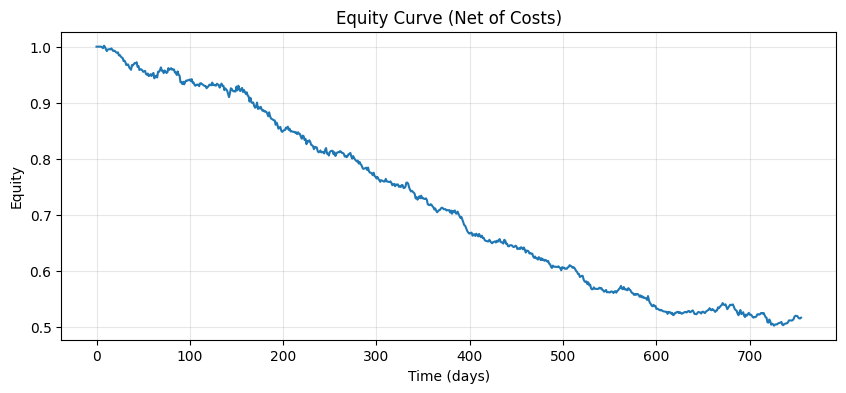

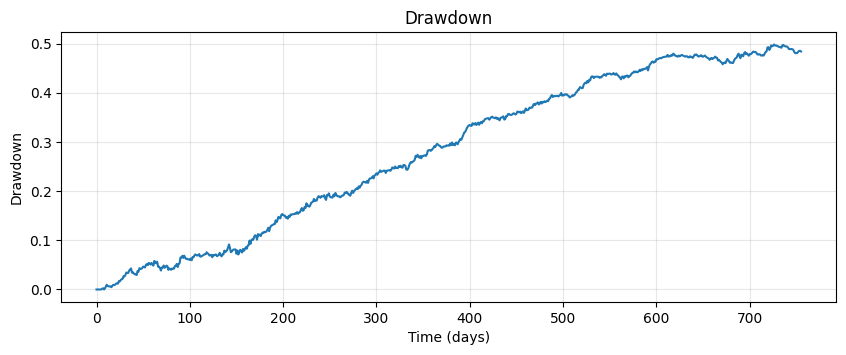

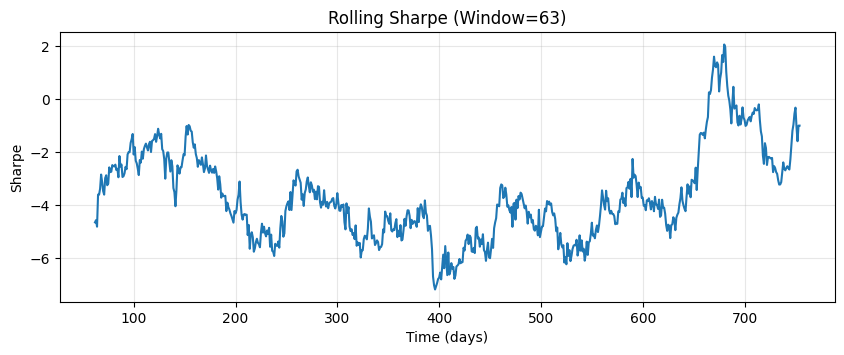

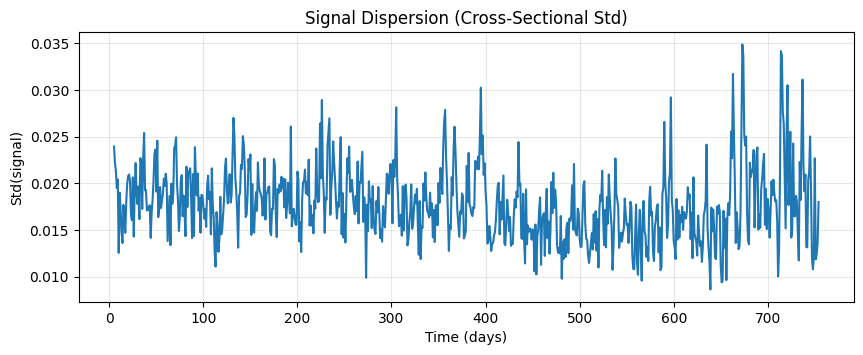

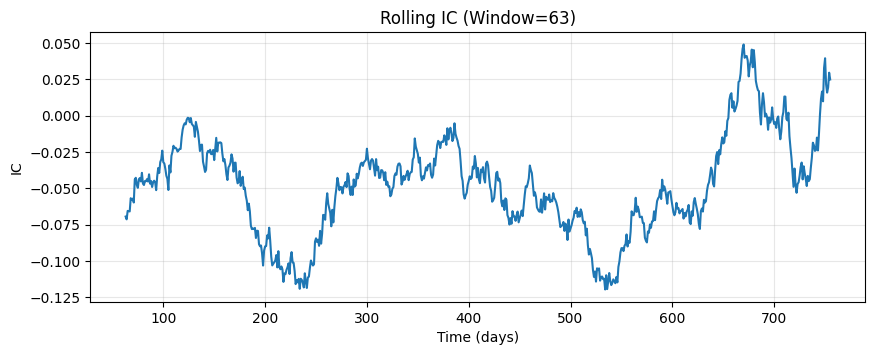

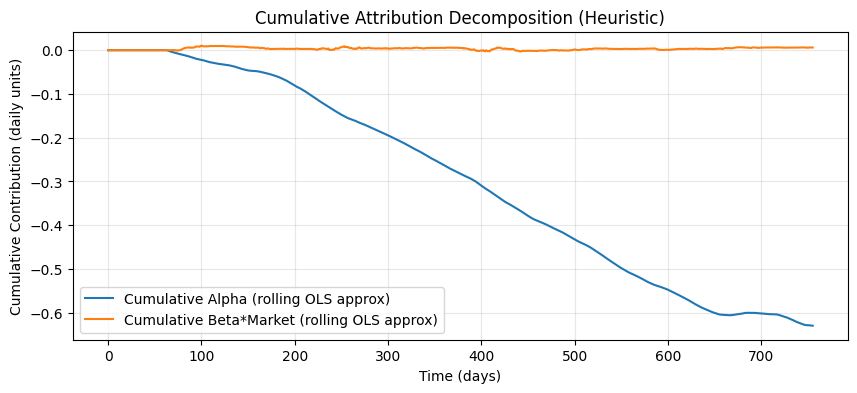

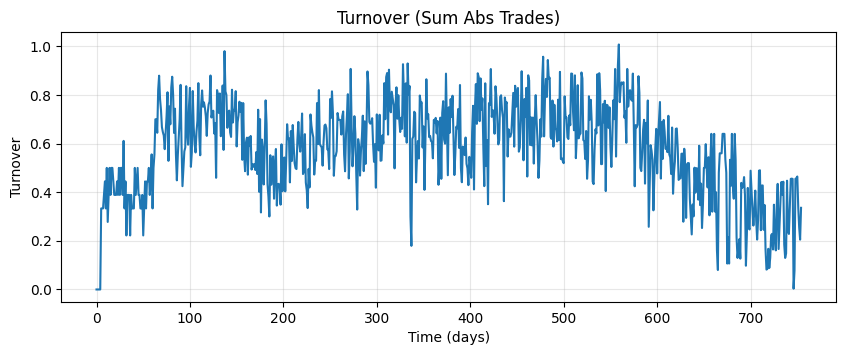

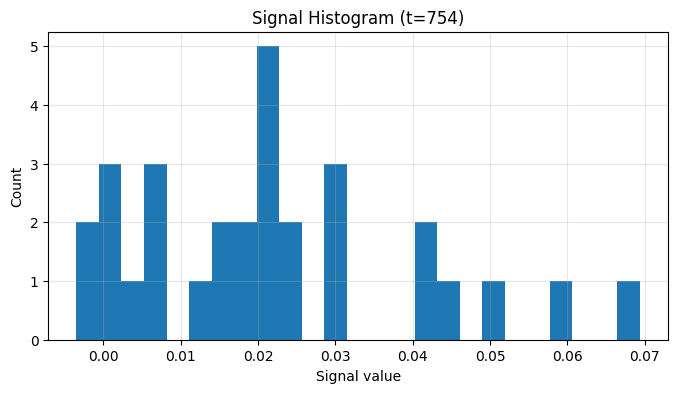

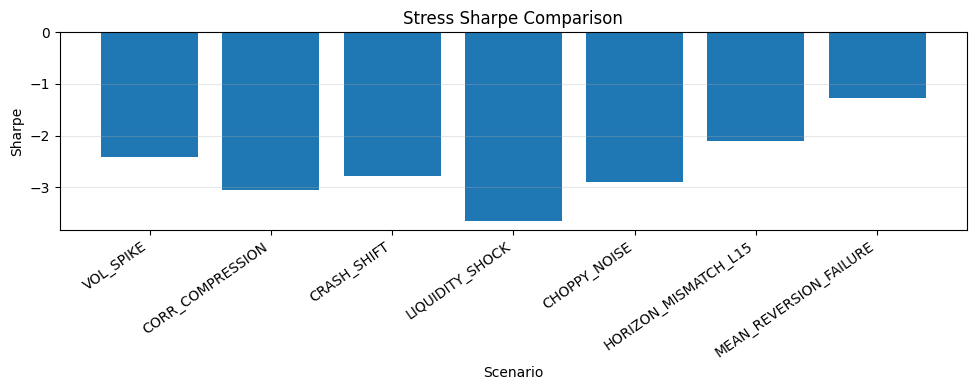

In [17]:
# ============================================================
# CELL 9 — Visualization Suite (Production-Grade, Matplotlib Only, No Narrative)
# ============================================================

import matplotlib.pyplot as plt

eq = BACKTEST["equity"]
dd = BACKTEST["drawdown"]
rets = BACKTEST["port_ret"]
turn = BACKTEST["turnover"]
ic = SIGNALS["ic_series"]
ric = SIGNALS["rolling_ic"]

def _rolling_sharpe_local(daily, rf_annual, W):
    out = [None]*len(daily)
    rf_daily = (1.0 + rf_annual)**(1.0/252.0) - 1.0
    for t in range(len(daily)):
        if t+1 < W:
            continue
        w = daily[t-W+1:t+1]
        ex = [r - rf_daily for r in w]
        v = _safe_pstdev(ex)
        out[t] = ((_safe_mean(ex)/v)*math.sqrt(252.0)) if v > 1e-12 else 0.0
    return out

rsh = _rolling_sharpe_local(rets, CONFIG["base_rf_annual"], CONFIG["rolling_window"])

alpha_c = BACKTEST["alpha_contrib"]
beta_c = BACKTEST["beta_contrib"]
cum_alpha = [0.0]
cum_beta = [0.0]
for t in range(1, len(eq)):
    cum_alpha.append(cum_alpha[-1] + (alpha_c[t-1] if (t-1) < len(alpha_c) else 0.0))
    cum_beta.append(cum_beta[-1] + (beta_c[t-1] if (t-1) < len(beta_c) else 0.0))

plt.figure(figsize=(10,4))
plt.plot(eq)
plt.title("Equity Curve (Net of Costs)")
plt.xlabel("Time (days)")
plt.ylabel("Equity")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(dd)
plt.title("Drawdown")
plt.xlabel("Time (days)")
plt.ylabel("Drawdown")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,3.5))
plt.plot([v if v is not None else float("nan") for v in rsh])
plt.title(f"Rolling Sharpe (Window={CONFIG['rolling_window']})")
plt.xlabel("Time (days)")
plt.ylabel("Sharpe")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,3.5))
plt.plot([v if v is not None else float("nan") for v in SIGNALS["signal_dispersion"]])
plt.title("Signal Dispersion (Cross-Sectional Std)")
plt.xlabel("Time (days)")
plt.ylabel("Std(signal)")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,3.5))
plt.plot([v if v is not None else float("nan") for v in ric])
plt.title(f"Rolling IC (Window={CONFIG['rolling_window']})")
plt.xlabel("Time (days)")
plt.ylabel("IC")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(cum_alpha, label="Cumulative Alpha (rolling OLS approx)")
plt.plot(cum_beta, label="Cumulative Beta*Market (rolling OLS approx)")
plt.title("Cumulative Attribution Decomposition (Heuristic)")
plt.xlabel("Time (days)")
plt.ylabel("Cumulative Contribution (daily units)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(10,3.5))
plt.plot(turn)
plt.title("Turnover (Sum Abs Trades)")
plt.xlabel("Time (days)")
plt.ylabel("Turnover")
plt.grid(True, alpha=0.3)
plt.show()

# Signal histogram at latest eligible day
t_last = None
vals = []
for t in range(n_days-2, -1, -1):
    tmp = []
    for aid in ids:
        s = SIGNALS["signal"][aid][t]
        if s is not None:
            tmp.append(s)
    if len(tmp) >= min_eligible:
        t_last = t
        vals = tmp
        break

plt.figure(figsize=(8,4))
plt.hist(vals, bins=25)
plt.title(f"Signal Histogram (t={t_last})")
plt.xlabel("Signal value")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

names = [s["name"] for s in STRESS["results"]]
sharpes = [s["sharpe"] for s in STRESS["results"]]
plt.figure(figsize=(10,4))
plt.bar(range(len(names)), sharpes)
plt.title("Stress Sharpe Comparison")
plt.xlabel("Scenario")
plt.ylabel("Sharpe")
plt.xticks(range(len(names)), names, rotation=35, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


##10.AUDIT BUNDLE

###10.1.OVERVIEW



Cell 10 produces the maximum audit bundle: parameter sensitivity, Monte Carlo robustness envelopes, artifact hashing, and final packaging into a tamper-evident zip. The purpose is to transform the notebook from a one-off analysis into a reproducible research artifact that can be reviewed, replicated, and governed. In an institutional setting, this cell approximates the minimum deliverable standard for model risk management: the model must produce a complete set of artifacts that document what was run, what was assumed, what was observed, and how integrity is maintained.

Parameter sensitivity is implemented as a structured grid over core hyperparameters: signal lookback, holding horizon, and selection quantile. These parameters define the economic identity of the strategy. Changing the lookback changes whether the signal is capturing microstructure bounce versus slower pressure decay. Changing the holding horizon changes whether the policy is aligned with the signal’s decay mechanism. Changing the quantile changes how concentrated the contrarian expression is. The grid therefore does not merely measure “tuning.” It maps the local geometry of the strategy in parameter space. If performance exists only in a narrow region, the strategy is fragile and likely over-dependent on specific timing in the environment. If performance is broad and stable, the mechanism is more robust in the synthetic setting.

The Monte Carlo robustness envelope perturbs the realized return stream via residual resampling to generate a distribution of terminal outcomes and drawdowns. The point is not to claim statistical forecasting power; it is to quantify how sensitive conclusions are to noise in a controlled proxy sense. A strategy with a wide envelope and severe tail drawdowns is governance-fragile even if its point estimate is attractive. Conversely, a strategy with modest point estimates but a tight envelope may be more operationally reliable. The envelope teaches the reviewer to think probabilistically about feasibility, not deterministically about a single trajectory.

Artifact hashing and hash registries are the integrity layer. Every deliverable is hashed, and the hash list is itself hashed into a master bundle hash. This creates a tamper-evident record: if any artifact changes, the registry and master hash change. In regulated environments, this pattern supports chain-of-custody and reproducibility audits. The audit index ties together run identifiers, configuration hashes, prompt fingerprints, and governance classifications, creating a single “front door” for reviewers.

The final zip bundle packages root logs (run manifest, risk log, prompt log) and all deliverables into one portable archive. This operationalizes reproducibility: a reviewer can obtain a single file and inspect the entire research run. The learning objective of Cell 10 is to demonstrate that professional quantitative research ends with governance artifacts, not with plots. A mechanism-first laboratory is only credible if its outputs are auditable, integrity-protected, and structured for independent review.


###10.2.CODE AND IMPLEMENTATION

In [18]:
# ============================================================
# CELL 10 — Audit Bundle (Production-Grade: Sensitivity, Monte Carlo, Hashing, ZIP)
# ============================================================

def _compute_drawdown_from_rets(daily):
    eq = 1.0
    peak = 1.0
    dd = []
    for r in daily:
        eq *= (1.0 + r)
        if eq > peak:
            peak = eq
        dd.append((peak - eq)/peak if peak > 1e-18 else 0.0)
    return dd

def _run_sensitivity_point(L_new, H_new, q_new):
    sigs = _signals_with_L(L_new)

    Hs = H_new
    qv = q_new
    cohorts = [{aid: 0.0 for aid in ids} for _ in range(Hs)]
    active = {aid: 0.0 for aid in ids}
    pr, pc, to = [], [], []

    for t in range(n_days-1):
        cohorts = [{aid: 0.0 for aid in ids}] + cohorts[:-1]
        tw, meta = _target_weights_for_day(t, sigs["signal"], CONFIG["liquidity_floor"], qv)

        scale = _risk_scale(pr, CONFIG["target_ann_vol"], W)
        if MARKET["regime_path"][t] == "CRISIS":
            scale *= CONFIG["crisis_gross_haircut"]
        tw = {aid: tw[aid]*scale for aid in ids}
        cohorts[0] = tw

        new_active = {aid: 0.0 for aid in ids}
        for k in range(Hs):
            ck = cohorts[k]
            for aid in ids:
                new_active[aid] += ck[aid]
        invH = 1.0/float(Hs)
        for aid in ids:
            new_active[aid] *= invH

        gross = sum(abs(new_active[aid]) for aid in ids)
        if gross > CONFIG["max_gross"] and gross > 1e-18:
            s = CONFIG["max_gross"]/gross
            for aid in ids:
                new_active[aid] *= s

        traded_abs_sum = 0.0
        c = 0.0
        for aid in ids:
            dw = new_active[aid] - active[aid]
            traded_abs = abs(dw)
            traded_abs_sum += traded_abs
            c += _execution_cost(traded_abs, MARKET["asset_liq"][aid][t], MARKET["liq_state"][t])
        to.append(traded_abs_sum)

        r_next = 0.0
        for aid in ids:
            r_next += new_active[aid] * MARKET["asset_ret"][aid][t+1]
        pr.append(r_next - c)
        pc.append(c)
        active = new_active

    return {
        "L": L_new, "H": H_new, "q": q_new,
        "sharpe": _sharpe(pr, CONFIG["base_rf_annual"]),
        "max_drawdown": _max_drawdown(_compute_drawdown_from_rets(pr)),
        "turnover_mean": _safe_mean(to)
    }

grid = []
for L_new in CONFIG["sensitivity"]["lookback_L"]:
    for H_new in CONFIG["sensitivity"]["hold_H"]:
        for q_new in CONFIG["sensitivity"]["quantile_q"]:
            grid.append(_run_sensitivity_point(L_new, H_new, q_new))

_atomic_write_json(os.path.join(DELIV_DIR, "parameter_sensitivity.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"market_generator_fixed": True},
                       open_items=["Expand sensitivity across multiple seeds and regime paths (out of scope)."],
                       analysis={"grid_size": len(grid)},
                       outputs={"grid": grid}
                   ))

base_rets = BACKTEST["port_ret"]
_require(len(base_rets) >= 200, "Backtest too short for Monte Carlo envelope")
mu = _safe_mean(base_rets)
resid = [r - mu for r in base_rets]

random.seed(CONFIG["seed"] + 999)
mc = []
for _ in range(CONFIG["monte_carlo_sims"]):
    eq = 1.0
    peak = 1.0
    mdd = 0.0
    for _t in range(len(base_rets)):
        r = mu + random.choice(resid)
        eq *= (1.0 + r)
        if eq > peak:
            peak = eq
        ddv = (peak - eq)/peak if peak > 1e-18 else 0.0
        if ddv > mdd:
            mdd = ddv
    mc.append({"terminal_equity": eq, "max_drawdown": mdd})

terminals = sorted([x["terminal_equity"] for x in mc])
mdds = sorted([x["max_drawdown"] for x in mc])

def _pct(xs, p):
    if not xs: return 0.0
    i = int(round(p*(len(xs)-1)))
    i = int(_clip(i, 0, len(xs)-1))
    return xs[i]

envelope = {
    "terminal_equity": {"p05": _pct(terminals, 0.05), "p50": _pct(terminals, 0.50), "p95": _pct(terminals, 0.95)},
    "max_drawdown": {"p05": _pct(mdds, 0.05), "p50": _pct(mdds, 0.50), "p95": _pct(mdds, 0.95)}
}

_atomic_write_json(os.path.join(DELIV_DIR, "monte_carlo_envelope.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"iid_residual_proxy": True},
                       open_items=["Consider block bootstrap for autocorrelation; evaluate multiple seeds."],
                       analysis={"n_sims": CONFIG["monte_carlo_sims"], "mu": mu},
                       outputs={"paths_summary": envelope, "samples_head": mc[:20]}
                   ))

_atomic_write_json(os.path.join(DELIV_DIR, "review_checklist.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={},
                       open_items=[
                           "Independent replication on clean runtime",
                           "Human review: signal leakage / generator coupling",
                           "Human review: execution model realism",
                           "MRM committee tier threshold approval"
                       ],
                       analysis={"minimum_review_standard": "Human review required; synthetic lab only."},
                       outputs={}
                   ))

required = [
    "metrics_summary.json","diagnostics.json","equity_curve.json","positions.json",
    "stress_test_results.json","parameter_sensitivity.json","monte_carlo_envelope.json",
    "fragility_analysis.json","model_risk_score.json","governance_maturity.json",
    "deployment_status.json","signal_matrix.json","execution_audit.json",
    "reproducibility_report.json","review_checklist.json","telemetry_stress.json"
]
for fn in required:
    p = os.path.join(DELIV_DIR, fn)
    if not os.path.exists(p):
        _atomic_write_json(p, _json_envelope(facts={"run_id": RUN_ID}, open_items=["Auto-created placeholder."]))

def _hash_file(path):
    with open(path, "rb") as f:
        return _sha256_bytes(f.read())

artifact_hashes = {}
for fn in sorted(os.listdir(DELIV_DIR)):
    if fn.lower().endswith(".json"):
        artifact_hashes[f"deliverables/{fn}"] = _hash_file(os.path.join(DELIV_DIR, fn))
artifact_hashes["run_manifest.json"] = _hash_file(run_manifest_path)
artifact_hashes["risk_log.json"] = _hash_file(risk_log_path)
artifact_hashes["prompts_log.jsonl"] = _hash_file(prompts_log_path)

_atomic_write_json(os.path.join(DELIV_DIR, "artifact_hash_registry.json"),
                   _json_envelope(
                       facts={"run_id": RUN_ID},
                       assumptions={"sha256": True},
                       open_items=["For ops: store hash registry in immutable/WORM store."],
                       analysis={"n_artifacts_hashed": len(artifact_hashes)},
                       outputs={"hashes": artifact_hashes}
                   ))

master_bundle_hash = _sha256_str(json.dumps(sorted(artifact_hashes.items()), sort_keys=True))

audit_index = _json_envelope(
    facts={"run_id": RUN_ID, "timestamp_utc": _utc_now_iso()},
    assumptions={"bundle_self_contained": True},
    open_items=["Independent verification of bundle hash on second runtime."],
    analysis={
        "master_bundle_hash_sha256": master_bundle_hash,
        "config_sha256": CONFIG_HASH,
        "prompt_sha256": PROMPT_FINGERPRINT,
        "model_risk_tier": GOV["model_risk_tier"],
        "deployment_status": GOV["deployment_status"]
    },
    outputs={"artifacts": sorted(list(artifact_hashes.keys()))}
)

_atomic_write_json(os.path.join(DELIV_DIR, "audit_index.json"), audit_index)

bundle_path = os.path.join(ROOT_DIR, "lab_bundle.zip")
with zipfile.ZipFile(bundle_path, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write(run_manifest_path, arcname="run_manifest.json")
    z.write(risk_log_path, arcname="risk_log.json")
    z.write(prompts_log_path, arcname="prompts_log.jsonl")
    for fn in sorted(os.listdir(DELIV_DIR)):
        z.write(os.path.join(DELIV_DIR, fn), arcname=f"deliverables/{fn}")


##11.CONCLUSION

**Conclusion**

This laboratory was designed to produce a specific kind of learning: not the superficial learning of “does a backtest go up,” but the deeper learning of how a short-horizon reversal mechanism behaves once it is embedded inside an explicit environment, routed through a concrete policy, and subjected to execution constraints and regime shifts. The most important takeaway is that short-term reversal is not a single phenomenon. It is the interaction of three layers: the return-generating process that determines whether price pressure is transitory or information-bearing; the cross-sectional surface that determines whether dispersion exists and remains exploitable; and the execution surface that determines whether the agent can express contrarian positions without converting theoretical edge into realized friction.

At the environment layer, the notebook emphasized regime-indexed structure. By design, volatility, correlation, and liquidity are not static parameters; they are state variables. This framing matters because short-horizon strategies live and die by state dependence. When volatility rises, target volatility scaling can mechanically reduce exposure; when correlation compresses, “market-neutral” portfolios can accidentally become market-exposed; when liquidity collapses, turnover becomes prohibitively expensive. These are not rare exceptions. They are the central failure channels for short-horizon reversal in real institutional settings. The synthetic environment makes these channels legible by turning them into controlled experimental knobs rather than leaving them as confounded empirical artifacts.

At the signal layer, the reversal score is deliberately minimalistic: a short lookback cumulative return with a contrarian sign. That simplicity is pedagogically important because it prevents the model from hiding behind feature engineering. The signal either aligns with next-period cross-sectional returns in the constructed world or it does not. The Information Coefficient and its rolling variant provide a clear diagnostic: not a promise of out-of-sample performance, but an internal consistency check on whether the environment actually contains a detectable mean-reversion component. When the rolling IC weakens or changes sign, the correct interpretation is structural, not emotional. It indicates that the dominant driver of short-horizon returns has shifted—from transitory pressure to trend persistence, from idiosyncratic shocks to common-factor synchronization, or from liquid adjustment to constrained liquidation.

At the policy layer, the notebook’s long–short construction highlights how cross-sectional intent can be distorted by constraints. Liquidity filters are not merely “risk controls.” They change the effective universe, and therefore the cross-sectional opportunity set. Concentration caps and leg normalization shape the portfolio’s exposure to tails and to crowding. Overlapping cohorts matter because they encode a practical truth: inventory does not jump costlessly; it transitions. In an institutional context, the difference between a daily flip and a smoothed transition can be the difference between a strategy that is implementable and one that is purely notional.

Execution realism dominated the laboratory’s interpretation. The cost model—linear fees, liquidity-scaled slippage, and convex impact—expresses a professional intuition: at short horizons, execution is the mechanism. A reversal strategy with strong theoretical edge can be fully neutralized by turnover and impact. Conversely, a modest edge can be preserved if the policy is designed to trade with the market rather than against it, to respect liquidity floors, and to reduce gross during stress. The notebook’s explicit logging of turnover and cost series is therefore not bookkeeping; it is the empirical surface on which feasibility is evaluated. If turnover spikes during correlation compression or liquidity shock scenarios, the strategy’s apparent robustness becomes suspect. If costs become a large fraction of gross returns, the agent is not “earning alpha”; it is transferring value to liquidity providers.

The stress suite reinforces a mechanism-first view of fragility. Generic scenarios—volatility spikes, crash overlays, liquidity shocks, correlation compression—are not meant to mimic specific historical episodes. They are meant to probe causal structure. If a volatility spike destroys performance while a liquidity shock does not, the strategy’s fragility is primarily risk-scaling related rather than execution related. If correlation compression causes drawdown amplification, the strategy’s neutrality is conditional and may fail under synchronization. Strategy-specific stresses are even more revealing. A mean-reversion failure test directly attacks the hypothesis that transitory pressure exists; if the strategy survives that attack, it may be harvesting something other than reversal (for example, factor exposure or structural biases in the generator). A horizon mismatch test attacks the temporal alignment between lookback and holding period; if results change drastically, the signal’s economic content is horizon-specific and vulnerable to regime-dependent timing shifts.

The governance layer formalizes these insights into professional artifacts: fragility scoring, model risk tiering, and deployment classification. The fragility score is not a claim of truth; it is a disciplined heuristic that forces the research process to answer hard questions. How fast does Sharpe degrade under stress? How much does drawdown amplify? How sensitive is the outcome to hyperparameters? How wide is the Monte Carlo envelope when residuals are perturbed? These questions operationalize the difference between a toy backtest and a research system suitable for internal review. The resulting tiering—LOW, MODERATE, HIGH—should be read as a governance posture, not as a performance verdict. A strategy can show attractive synthetic metrics and still be “HIGH” risk if it is fragile to execution shocks or if it depends on a narrow parameter slice.

A key professional insight is that execution dominates theory precisely where short-term reversal appears most attractive. Reversal edges are often discussed as if they were free statistical regularities. In practice, they are small, capacity-limited, and highly sensitive to market state. The laboratory’s design encourages iterative experimentation that respects causality. One should vary the regime-dependent mean-reversion strength to determine whether the signal is truly driven by transitory pressure. One should collapse dispersion to see wheth
